In [12]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

path = os.getcwd()

filename = '/src/tables/fM_tables/fM_add0.txt'
file1 = '{}/{}'.format(path,filename)
df = pd.read_csv(file1, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 

filename2 = 'results/test/life_evolutions.txt'
file2 = '{}/{}'.format(path,filename2)
data = open(file2,'r')

file_name = "iterations/M_1.989e+40_a_0.999.txt"
file_name4 = "iterations/M_1.989e+40_a_0.75.txt"
file_name5 = "iterations/M_1.989e+40_a_0.50.txt"
file_name6 = "iterations/M_1.989e+40_a_0.25.txt"
file_name7 = "iterations/M_1.989e+35_a_0.999.txt"
file_name8 = "iterations/M_1.989e+30_a_0.999.txt"
file_name9 = "iterations/a1_DMspin2_M_1.989e+40.txt"
file_name10 = "iterations/a1_DMspin0_M_1.989e+40.txt"
file_name11 = "iterations/a1_DMspin1_M_1.989e+40.txt"

placeholder = 'Vary_a/Kerr_a0.999.txt'



/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/3828961217.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file1, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')


In [13]:
# Text file generator

f = open(placeholder, "a")

# Create a new textfile named 'Ang_Mom_BH.txt' to save current iteration of BlackHawk code data. 
# Otherwise will lose current parameters when rerunning code. 

if os.path.exists(placeholder) == True:
    while True:

        t = input('Overwrite data file (y/n) (BE CAREFUL TO USE CORRECT METRIC): ')
        
        if t == 'y':
            open(placeholder, "w").close()
            for a in data:
                f.write(str(a))
            f.close()
            break
        elif t == 'n':
            break
        
        else:
            print('Invalid input')
            
else:
    for a in data:
        f.write(str(a))
    f.close()





# fM(x,$a^*$)

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/1002852677.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_data = pd.read_csv(file_name, delim_whitespace=True, header = 'infer', skiprows=2)


Text(0.5, 1.0, 'fM vs mass, $a^* = 0$')

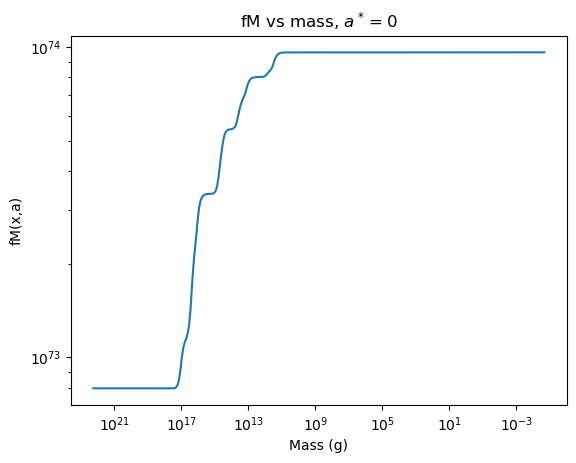

In [14]:
#Make sure this notebook is in the same folder as the Blackhawk code, otherwise this stuff isnt gonna run. 
# BlackHawk output data in pandas dataframe
# 'output' variable is tuple containing spin and mass in the form (a,M)
output_data = pd.read_csv(file_name, delim_whitespace=True, header = 'infer', skiprows=2)
output = [(a,b) for a,b in zip(output_data['a'],output_data['M'])]



#Index mass is in GeV, need to convert to g
# fM, gM both in units of GeV^4
mass = df.index/(5.60958884e+23)
fM_a0 = df['0.00000e+00']

plt.plot(mass,fM_a0)
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Mass (g)')
plt.ylabel('fM(x,a)')
plt.title('fM vs mass, $a^* = 0$')

# Now need to use output data to extract fM for time evolved $a^*$ values

In [15]:
def closest_value(lst, target):
    return min(lst, key=lambda x: abs(x - target))

def cell_finderfM(out):
    path = os.getcwd()
    filename = '/src/tables/fM_tables/fM_add0.txt'
    file1 = '{}/{}'.format(path,filename)
    df = pd.read_csv(file1, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
#Get list of all computed a^* values
#Convert from str to float
    header = df.columns
    header = [float(a) for a in header]

#Conversion factor to get fM and Blackhawk output data in same units (fM in GeV, BH in grams)
    gev_to_g = 5.60958884e+23

    fM_a = []
    a = []
    m = []

    # Below loop looks at each line of the blackhawk output
    # First looks at spin (a) and finds the closest existing column in fM (or gM)
    # Then finds the closest existing mass value, and finally extracts the specific cell in fM (or gM) that
    # has an rate for the given black hole mass and effective spin
    for x in out:

        closest_a = closest_value(header, x[0])
        closest_m = closest_value(df.index,gev_to_g*x[1])
        cell = df.loc[closest_m, "{:.5e}".format(closest_a)]
        a.append(closest_a)
        m.append(closest_m)
        fM_a.append(cell)
    return fM_a

def cell_findergM(out):
    path = os.getcwd()
    filename3 = '/src/tables/fM_tables/gM_add0.txt'
    file3 = '{}/{}'.format(path,filename3)
    gdata = pd.read_csv(file3, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 
#Get list of all computed a^* values
#Convert from str to float
    header = df.columns
    header = [float(a) for a in header]

#Conversion factor to get fM and Blackhawk output data in same units (fM in GeV, BH in grams)
    gev_to_g = 5.60958884e+23

    gM_a = []
    a = []
    m = []

    #Same as above but replaces fM with gM table
    for x in out:
        closest_a = closest_value(header, x[0])
        closest_m = closest_value(gdata.index,gev_to_g*x[1])
        cell = gdata.loc[closest_m, "{:.5e}".format(closest_a)]
        a.append(closest_a)
        m.append(closest_m)
        gM_a.append(cell)
    return gM_a

fM_a = cell_finderfM(output)



        

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/1904804175.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file1, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')


# Plotting both fM(a=0) and fM(a->1) against mass

7.95172e+72
9.63869e+73


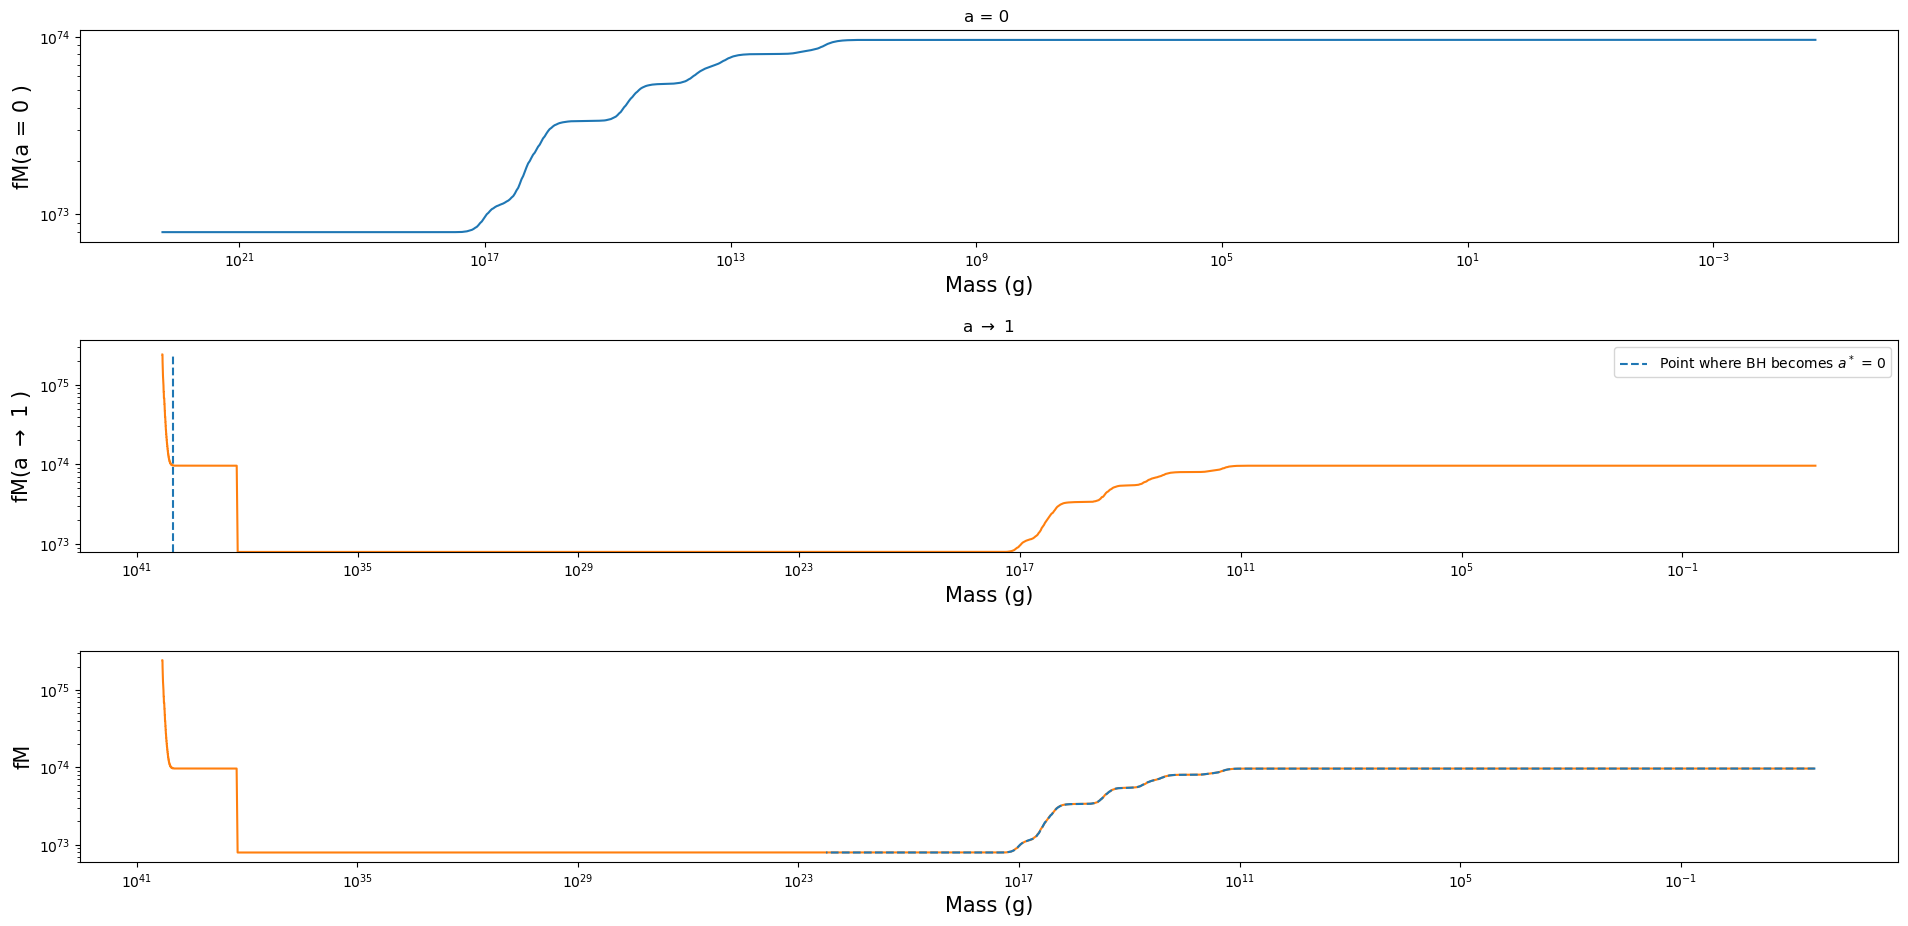

In [16]:
print(min(fM_a0))
print(max(fM_a0))
fsize = 15 
fig, ax = plt.subplots(3,1, figsize = ( (20,10)))
fig.tight_layout(pad = 5)

ax[0].plot(mass,fM_a0,color = 'tab:blue')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel( 'Mass (g)', fontsize=fsize)
ax[0].set_ylabel( 'fM(a = 0 )', fontsize= fsize)
ax[0].invert_xaxis()
ax[0].set_title('a = 0 ')

ax[1].plot(output_data['M'],fM_a,color = 'tab:orange')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel( 'Mass (g)', fontsize=fsize)
ax[1].set_ylabel( 'fM(a $\\rightarrow$ 1 )', fontsize= fsize)
ax[1].vlines(1e40,min(fM_a0),max(fM_a), linestyle = '--', label = 'Point where BH becomes $a^*$ = 0')
ax[1].set_ylim(min(fM_a0),max(fM_a)*1.5)
ax[1].legend()
ax[1].invert_xaxis()
ax[1].set_title('a $\\rightarrow$ 1 ')

ax[2].plot(output_data['M'],fM_a,color = 'tab:orange')
ax[2].plot(mass,fM_a0,color = 'tab:blue', linestyle = '--')
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel( 'Mass (g)', fontsize=fsize)
ax[2].set_ylabel( 'fM', fontsize= fsize)
ax[2].invert_xaxis()

# gM(x,$a^*$)

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/4211846089.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gdata = pd.read_csv(file3, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')


Text(0.5, 1.0, 'gM vs mass, $a^* = 0$')

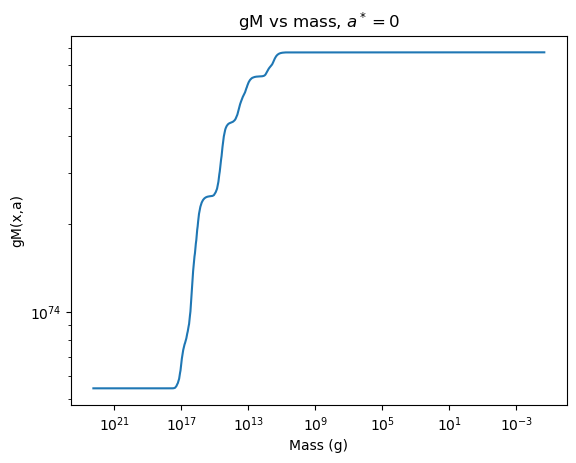

In [17]:
path = os.getcwd()
filename3 = '/src/tables/fM_tables/gM_add0.txt'
file3 = '{}/{}'.format(path,filename3)

gdata = pd.read_csv(file3, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a') 

#Index mass is in GeV
mass = gdata.index/(5.60958884e+23)
gM_a0 = gdata['0.00000e+00']

plt.plot(mass,gM_a0)
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Mass (g)')
plt.ylabel('gM(x,a)')
plt.title('gM vs mass, $a^* = 0$')

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/1904804175.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gdata = pd.read_csv(file3, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


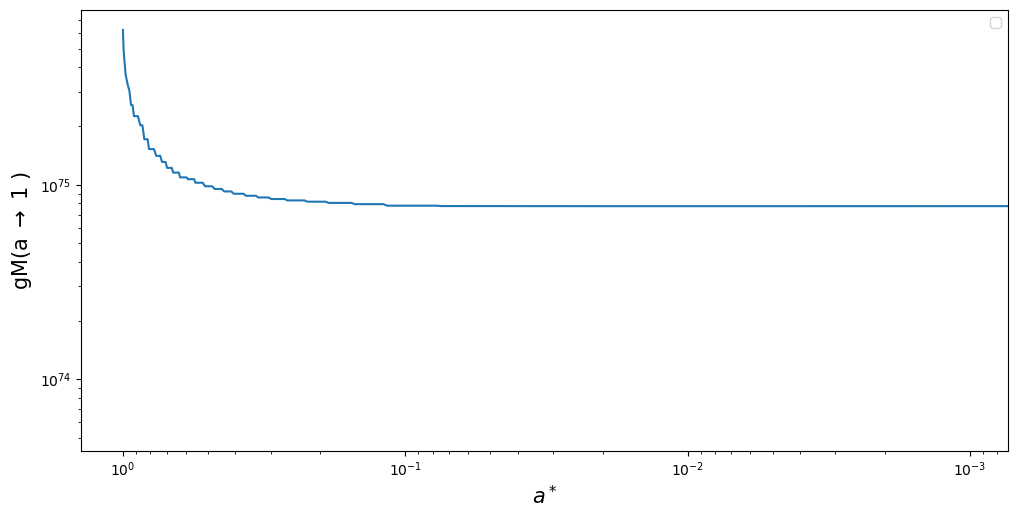

In [18]:
gM_a = cell_findergM(output)

plt.figure(figsize=(10, 5) )
plt.gca().invert_xaxis()
plt.tight_layout()


plt.plot(output_data['a'],gM_a,color = 'tab:blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel( '$a^*$', fontsize=fsize)
plt.ylabel( 'gM(a $\\rightarrow$ 1 )', fontsize= fsize)
plt.legend()


# ax[2].plot(output_data['M']/gev_to_g,gM_a,color = 'tab:orange')



# $\frac{dJ}{dt}$

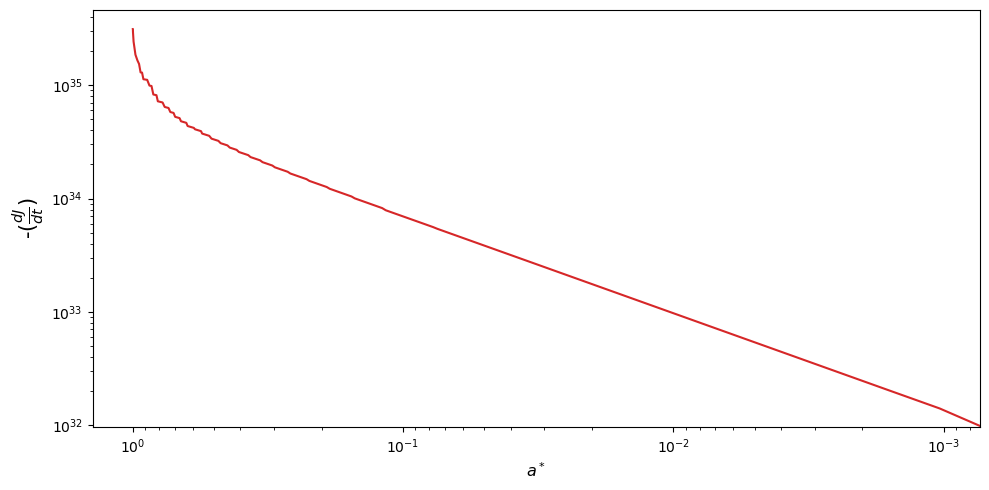

In [19]:
dJdt = []
a = []
m = []
header = df.columns
header = [float(a) for a in header]
gev_to_g = 5.60958884e+23
    
for x in output:
    closest_a = closest_value(header, x[0])
    closest_m = closest_value(gdata.index,gev_to_g*x[1])
    cell = gdata.loc[closest_m, "{:.5e}".format(closest_a)]
    a.append(closest_a)
    m.append(closest_m)
    dJdt.append(x[0]*cell/x[1])

plt.figure(figsize=(10, 5) )
plt.plot(output_data['a'],dJdt, color = 'tab:red')
plt.xscale('log')

plt.xlabel('$a^*$',fontsize= fsize/1.3)
plt.ylabel('-($\\frac{dJ}{dt}$)', fontsize= fsize)
plt.yscale('log')



plt.gca().invert_xaxis()
plt.tight_layout()

# $\frac{da^*}{dt}$ vs $a^*$

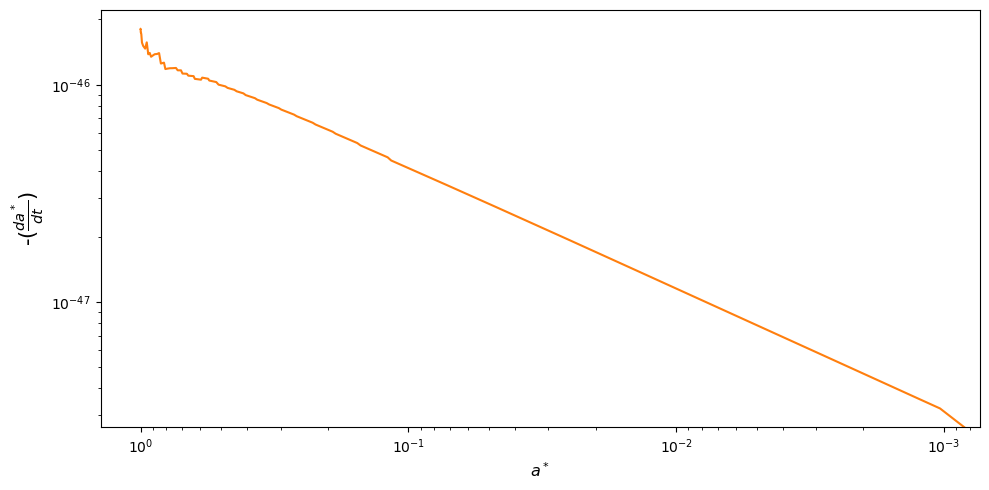

In [20]:
dadt = []
a = []
m = []
for x in output:
    closest_a = closest_value(header, x[0])
    closest_m = closest_value(gdata.index,gev_to_g*x[1])

    cellf = df.loc[closest_m, "{:.5e}".format(closest_a)]
    cellg = gdata.loc[closest_m, "{:.5e}".format(closest_a)]

    a.append(closest_a)
    m.append(closest_m)
    dadt.append(x[0]*(2*cellf-cellg)/x[1]**3)

plt.figure(figsize=(10, 5) )
plt.plot(output_data['a'],np.abs(dadt), color = 'tab:orange')
plt.xscale('log')
plt.xlabel('$a^*$',fontsize= fsize/1.3)
plt.ylabel('-($\\frac{da^*}{dt}$)', fontsize= fsize)
plt.yscale('log')
# plt.xlim(1.3e40,2.005e40)


plt.gca().invert_xaxis()
plt.tight_layout()

# $ \frac{1}{a^*}\frac{da^*}{dt}$ vs $a^*$

(1e+89, 3e+94)

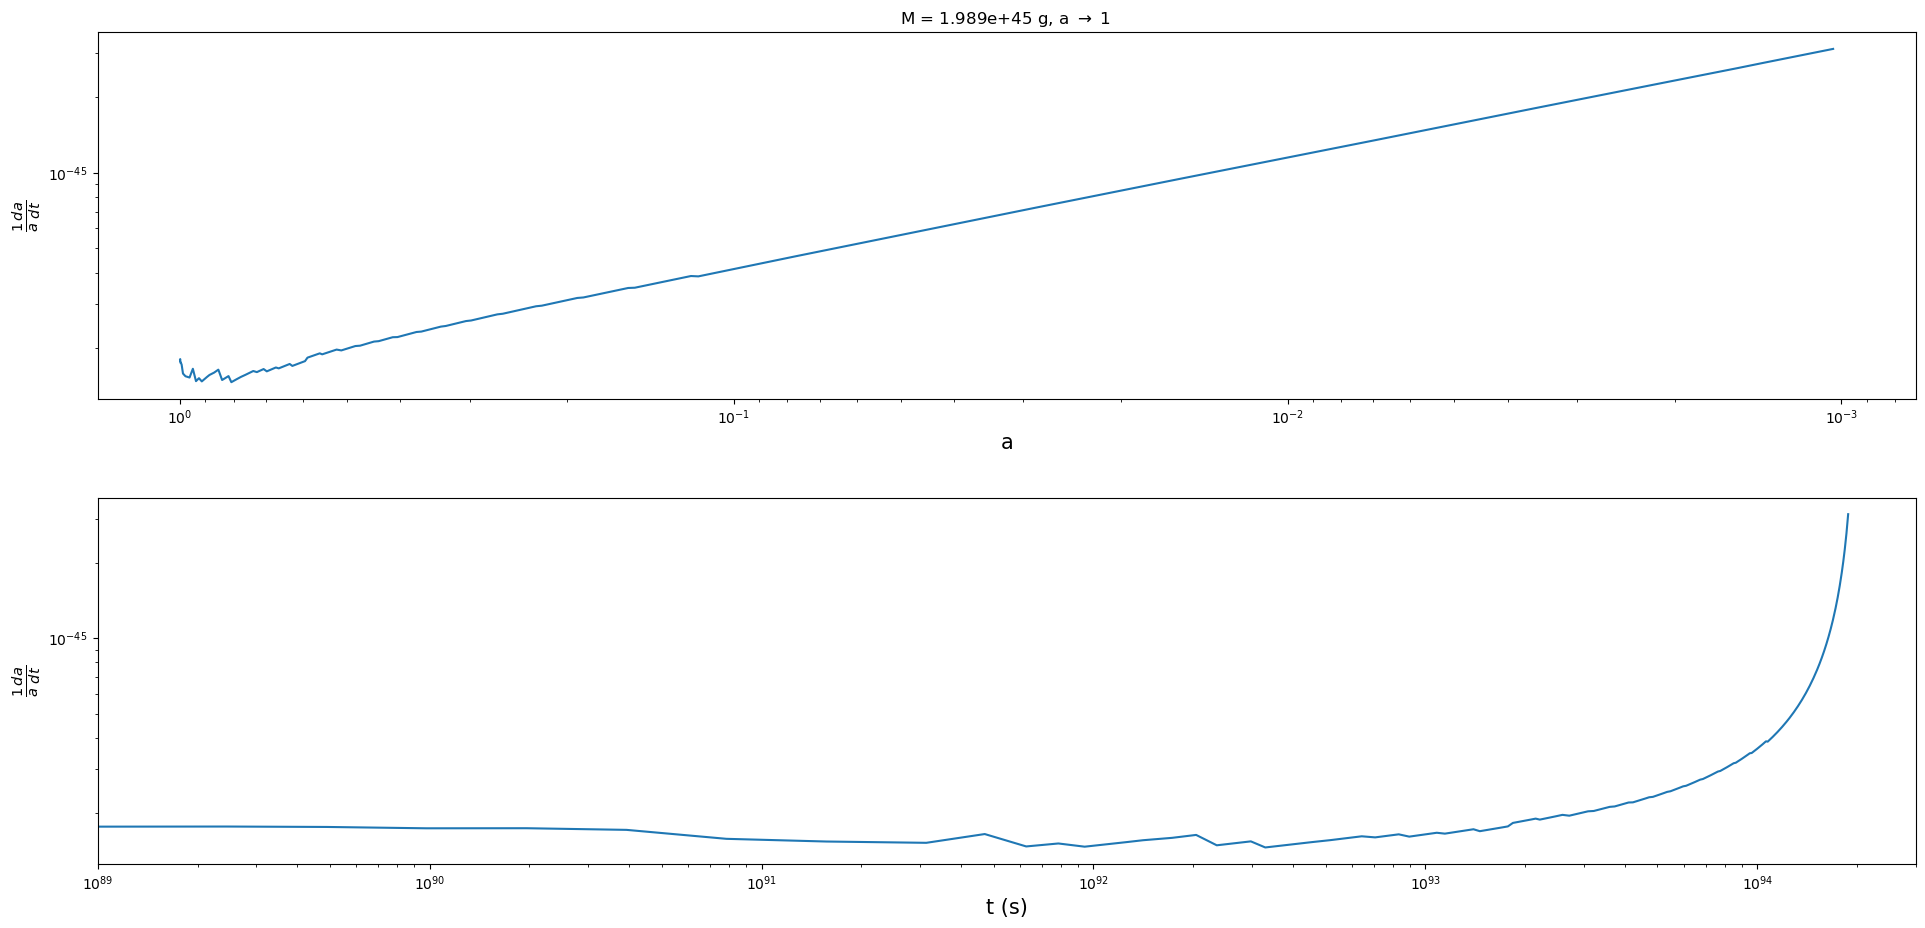

In [21]:

fig, ax = plt.subplots(2,1, figsize = ( (20,10)))
fig.tight_layout(pad = 5)

ax[0].plot(output_data['a'],np.divide(np.abs(dadt),output_data['a']),color = 'tab:blue')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel( 'a', fontsize=fsize)
ax[0].set_ylabel( '$\\frac{1}{a} \\frac{da}{dt}$', fontsize= fsize)
ax[0].invert_xaxis()
ax[0].set_title('M = 1.989e+45 g, a $\\rightarrow $ 1 ')

ax[1].plot(output_data['t'],np.divide(np.abs(dadt),output_data['a']),color = 'tab:blue')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel( 't (s)', fontsize=fsize)
ax[1].set_ylabel( '$\\frac{1}{a} \\frac{da}{dt}$', fontsize= fsize)
ax[1].set_xlim(1e89,3e94)



# Vary BH Spin 

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/1668936231.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_data075 = pd.read_csv(file_name4, delim_whitespace=True, header = 'infer', skiprows=2)
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/1668936231.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_data050 = pd.read_csv(file_name5, delim_whitespace=True, header = 'infer', skiprows=2)
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/1668936231.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_data025 = pd.read_csv(file_name6, delim_whitespace=True, header = 'infer', skiprows=2)


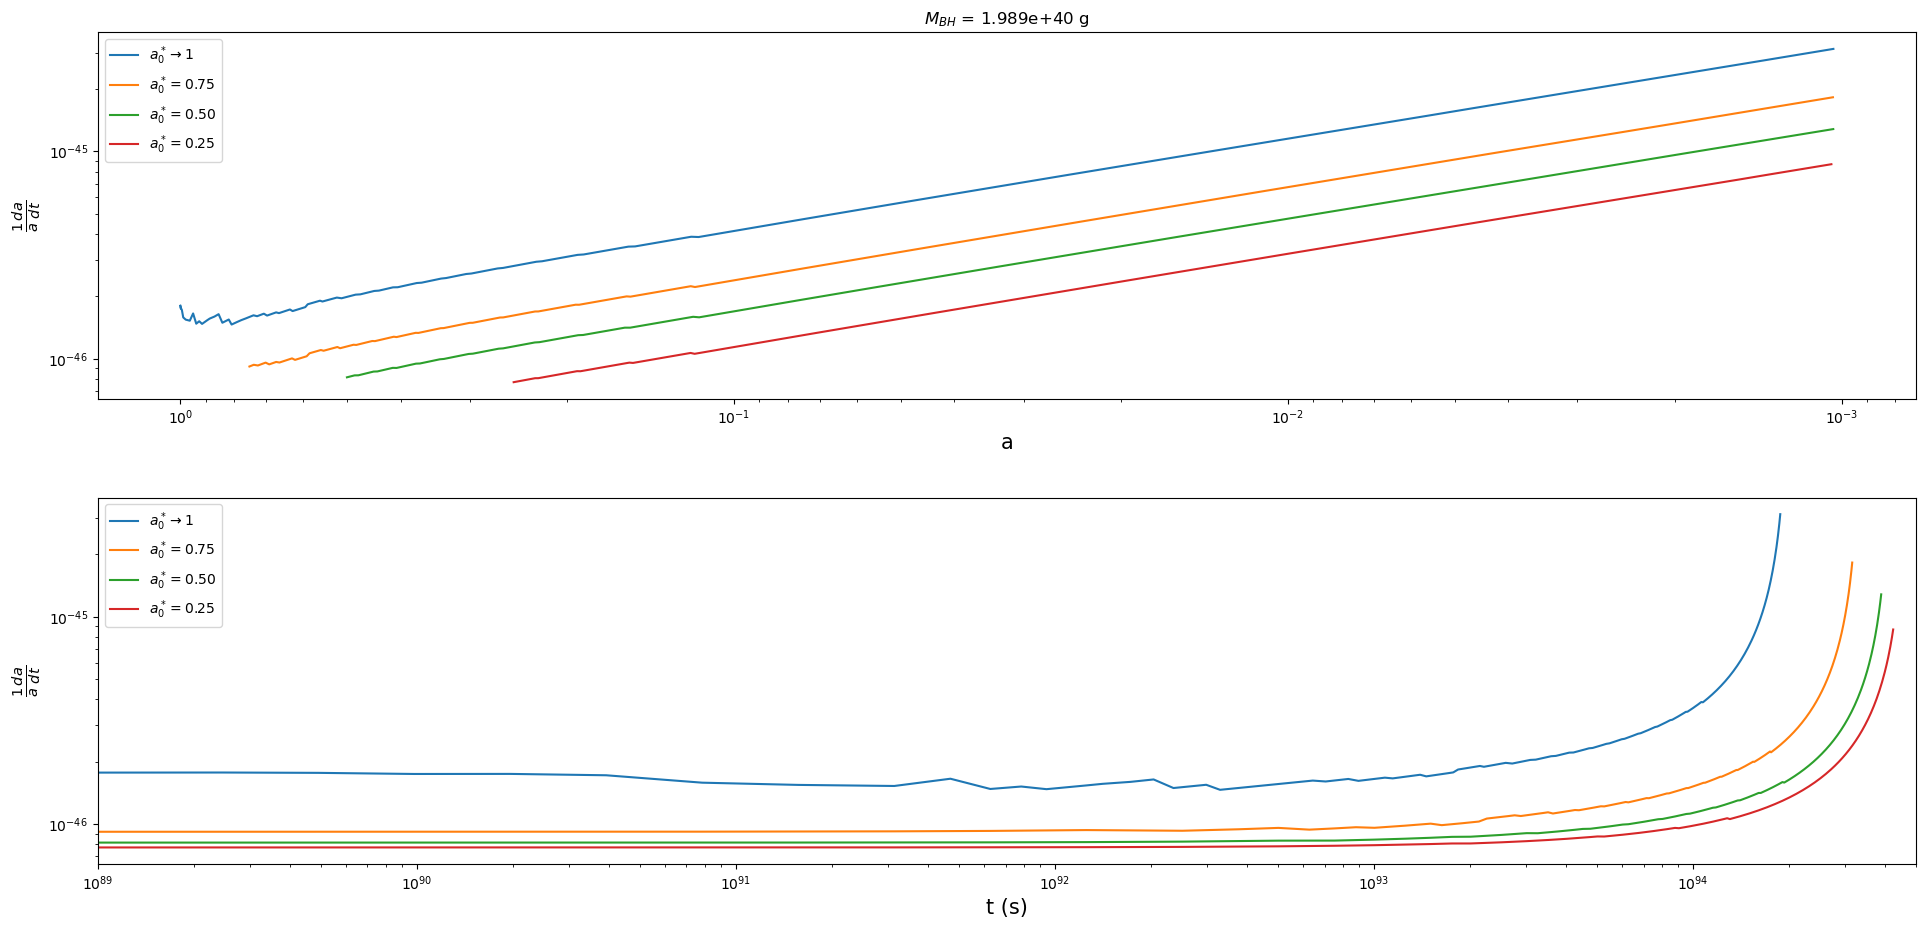

In [22]:
output_data075 = pd.read_csv(file_name4, delim_whitespace=True, header = 'infer', skiprows=2)
output075 = [(a,b) for a,b in zip(output_data075['a'],output_data075['M'])]

dadt075 = []

for x in output075:
    closest_a = closest_value(header, x[0])
    closest_m = closest_value(gdata.index,gev_to_g*x[1])

    cellf = df.loc[closest_m, "{:.5e}".format(closest_a)]
    cellg = gdata.loc[closest_m, "{:.5e}".format(closest_a)]

    dadt075.append(x[0]*(2*cellf-cellg)/x[1]**3)

output_data050 = pd.read_csv(file_name5, delim_whitespace=True, header = 'infer', skiprows=2)
output050 = [(a,b) for a,b in zip(output_data050['a'],output_data050['M'])]

dadt050 = []

for x in output050:
    closest_a = closest_value(header, x[0])
    closest_m = closest_value(gdata.index,gev_to_g*x[1])

    cellf = df.loc[closest_m, "{:.5e}".format(closest_a)]
    cellg = gdata.loc[closest_m, "{:.5e}".format(closest_a)]

    dadt050.append(x[0]*(2*cellf-cellg)/x[1]**3)

output_data025 = pd.read_csv(file_name6, delim_whitespace=True, header = 'infer', skiprows=2)
output025 = [(a,b) for a,b in zip(output_data025['a'],output_data025['M'])]

dadt025 = []

for x in output025:
    closest_a = closest_value(header, x[0])
    closest_m = closest_value(gdata.index,gev_to_g*x[1])

    cellf = df.loc[closest_m, "{:.5e}".format(closest_a)]
    cellg = gdata.loc[closest_m, "{:.5e}".format(closest_a)]

    dadt025.append(x[0]*(2*cellf-cellg)/x[1]**3)


fig, ax = plt.subplots(2,1, figsize = ( (20,10)))
fig.tight_layout(pad = 5)

ax[0].plot(output_data['a'],np.divide(np.abs(dadt),output_data['a']),color = 'tab:blue', label = '$a^*_{0} \\rightarrow 1 $')
ax[0].plot(output_data075['a'],np.divide(np.abs(dadt075),output_data075['a']),color = 'tab:orange', label = '$a^*_{0} = 0.75 $')
ax[0].plot(output_data050['a'],np.divide(np.abs(dadt050),output_data050['a']),color = 'tab:green', label = '$a^*_{0}  = 0.50  $')
ax[0].plot(output_data025['a'],np.divide(np.abs(dadt025),output_data025['a']),color = 'tab:red', label = '$a^*_{0} = 0.25  $')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel( 'a', fontsize=fsize)
ax[0].set_ylabel( '$\\frac{1}{a} \\frac{da}{dt}$', fontsize= fsize)
ax[0].invert_xaxis()
ax[0].set_title('$M_{BH}$ = 1.989e+40 g')
ax[0].legend()

ax[1].plot(output_data['t'],np.divide(np.abs(dadt),output_data['a']),color = 'tab:blue', label = '$a^*_{0} \\rightarrow 1 $')
ax[1].plot(output_data075['t'],np.divide(np.abs(dadt075),output_data075['a']),color = 'tab:orange', label = '$a^*_{0} = 0.75 $')
ax[1].plot(output_data050['t'],np.divide(np.abs(dadt050),output_data050['a']),color = 'tab:green', label = '$a^*_{0}  = 0.50  $')
ax[1].plot(output_data025['t'],np.divide(np.abs(dadt025),output_data025['a']),color = 'tab:red', label = '$a^*_{0} = 0.25  $')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel( 't (s)', fontsize=fsize)
ax[1].set_ylabel( '$\\frac{1}{a} \\frac{da}{dt}$', fontsize= fsize)
ax[1].set_xlim(1e89,5e94)
ax[1].legend()


# Changing mass leaving $a^* \rightarrow 1$

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/480095766.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_dataM1e35 = pd.read_csv(file_name7, delim_whitespace=True, header = 'infer', skiprows=2)
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/480095766.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_dataM1e30 = pd.read_csv(file_name8, delim_whitespace=True, header = 'infer', skiprows=2)


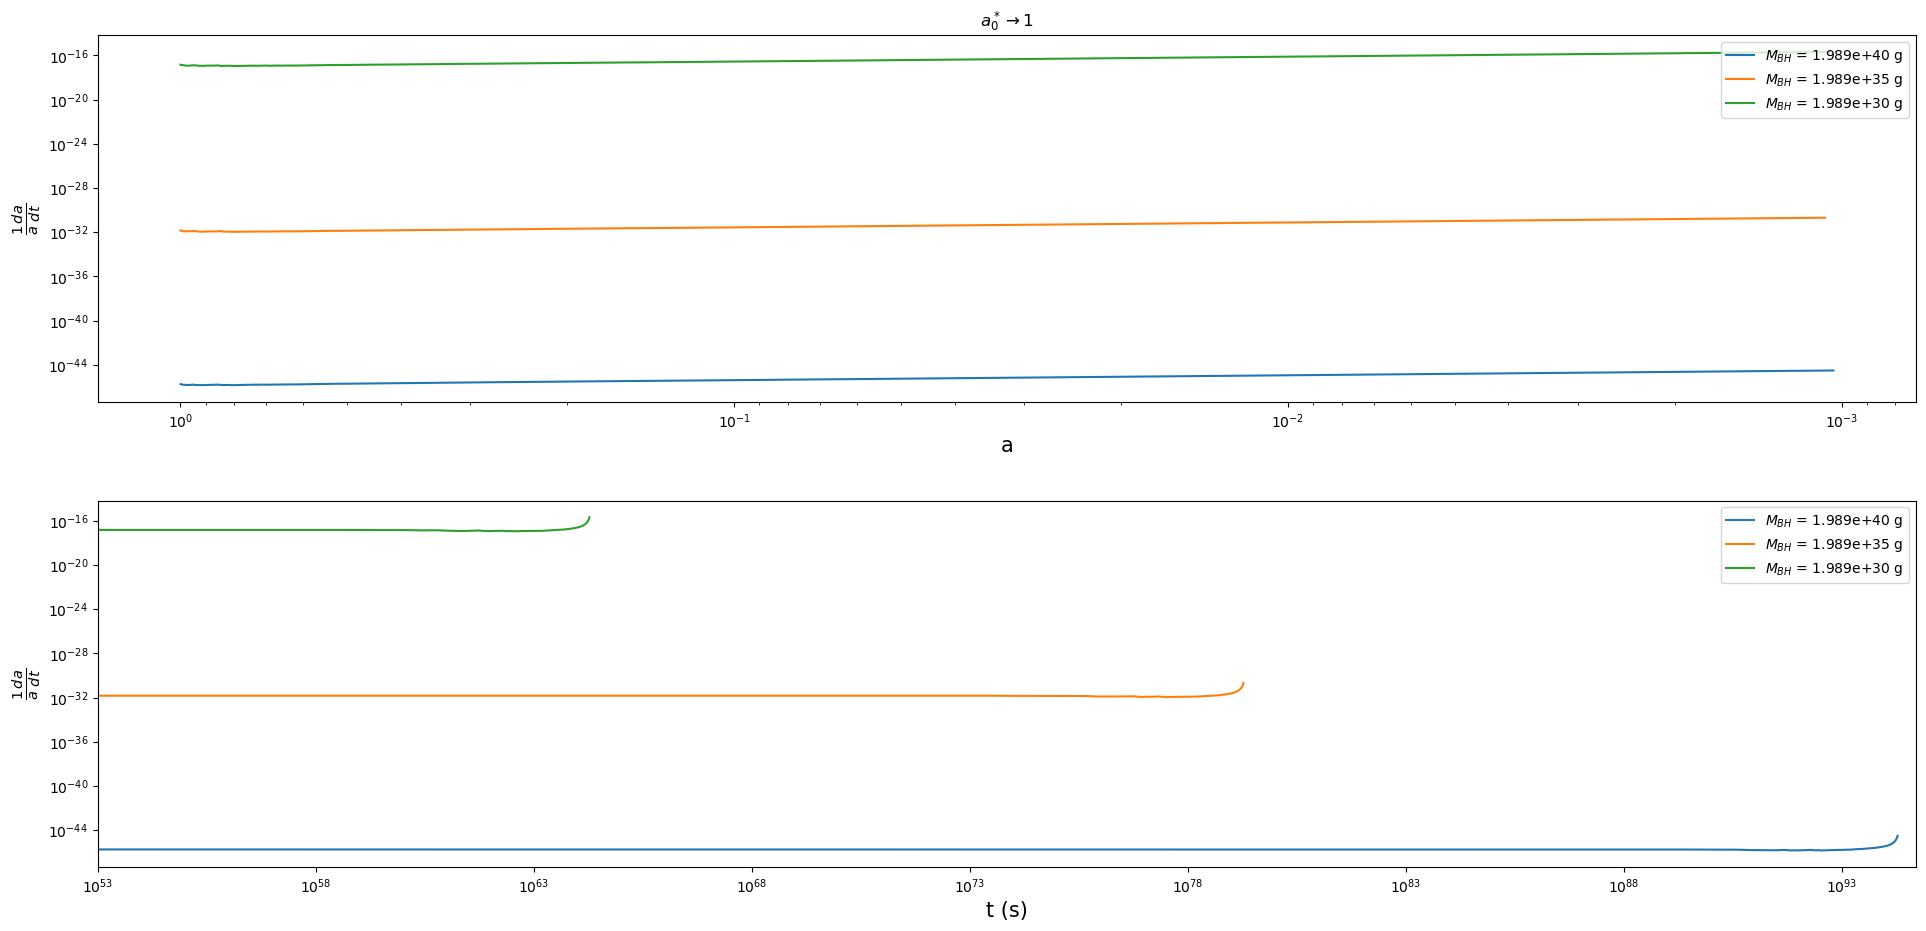

In [23]:
output_dataM1e35 = pd.read_csv(file_name7, delim_whitespace=True, header = 'infer', skiprows=2)
outputM1e35= [(a,b) for a,b in zip(output_dataM1e35['a'],output_dataM1e35['M'])]

dadtM1e35 = []

for x in outputM1e35:
    closest_a = closest_value(header, x[0])
    closest_m = closest_value(gdata.index,gev_to_g*x[1])

    cellf = df.loc[closest_m, "{:.5e}".format(closest_a)]
    cellg = gdata.loc[closest_m, "{:.5e}".format(closest_a)]

    dadtM1e35.append(x[0]*(2*cellf-cellg)/x[1]**3)


output_dataM1e30 = pd.read_csv(file_name8, delim_whitespace=True, header = 'infer', skiprows=2)
outputM1e30= [(a,b) for a,b in zip(output_dataM1e30['a'],output_dataM1e30['M'])]

dadtM1e30 = []

for x in outputM1e30:
    closest_a = closest_value(header, x[0])
    closest_m = closest_value(gdata.index,gev_to_g*x[1])

    cellf = df.loc[closest_m, "{:.5e}".format(closest_a)]
    cellg = gdata.loc[closest_m, "{:.5e}".format(closest_a)]

    dadtM1e30.append(x[0]*(2*cellf-cellg)/x[1]**3)


fig, ax = plt.subplots(2,1, figsize = ( (20,10)))
fig.tight_layout(pad = 5)

ax[0].plot(output_data['a'],np.divide(np.abs(dadt),output_data['a']),color = 'tab:blue', label = '$M_{BH}$ = 1.989e+40 g')
ax[0].plot(output_dataM1e35['a'],np.divide(np.abs(dadtM1e35),output_dataM1e35['a']),color = 'tab:orange', label = '$M_{BH}$ = 1.989e+35 g')
ax[0].plot(output_dataM1e30['a'],np.divide(np.abs(dadtM1e30),output_dataM1e30['a']),color = 'tab:green', label = '$M_{BH}$ = 1.989e+30 g')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel( 'a', fontsize=fsize)
ax[0].set_ylabel( '$\\frac{1}{a} \\frac{da}{dt}$', fontsize= fsize)
ax[0].invert_xaxis()
ax[0].set_title('$a^*_{0} \\rightarrow 1 $')
ax[0].legend()

ax[1].plot(output_data['t'],np.divide(np.abs(dadt),output_data['a']),color = 'tab:blue', label = '$M_{BH}$ = 1.989e+40 g')
ax[1].plot(output_dataM1e35['t'],np.divide(np.abs(dadtM1e35),output_dataM1e35['a']),color = 'tab:orange', label = '$M_{BH}$ = 1.989e+35 g')
ax[1].plot(output_dataM1e30['t'],np.divide(np.abs(dadtM1e30),output_dataM1e30['a']),color = 'tab:green', label = '$M_{BH}$ = 1.989e+30 g')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel( 't (s)', fontsize=fsize)
ax[1].set_ylabel( '$\\frac{1}{a} \\frac{da}{dt}$', fontsize= fsize)
ax[1].set_xlim(1e53,5e94)
ax[1].legend()


# DM Spin

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/60331500.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_dataS0 = pd.read_csv(file_name10, delim_whitespace=True, header = 'infer', skiprows=2)
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/60331500.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_dataS1 = pd.read_csv(file_name11, delim_whitespace=True, header = 'infer', skiprows=2)
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/60331500.py:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_dataS2 = pd.read_csv(file_name9, delim_whitespace=True, header = 'infer', skiprows=2)


3.122638804420798e-45


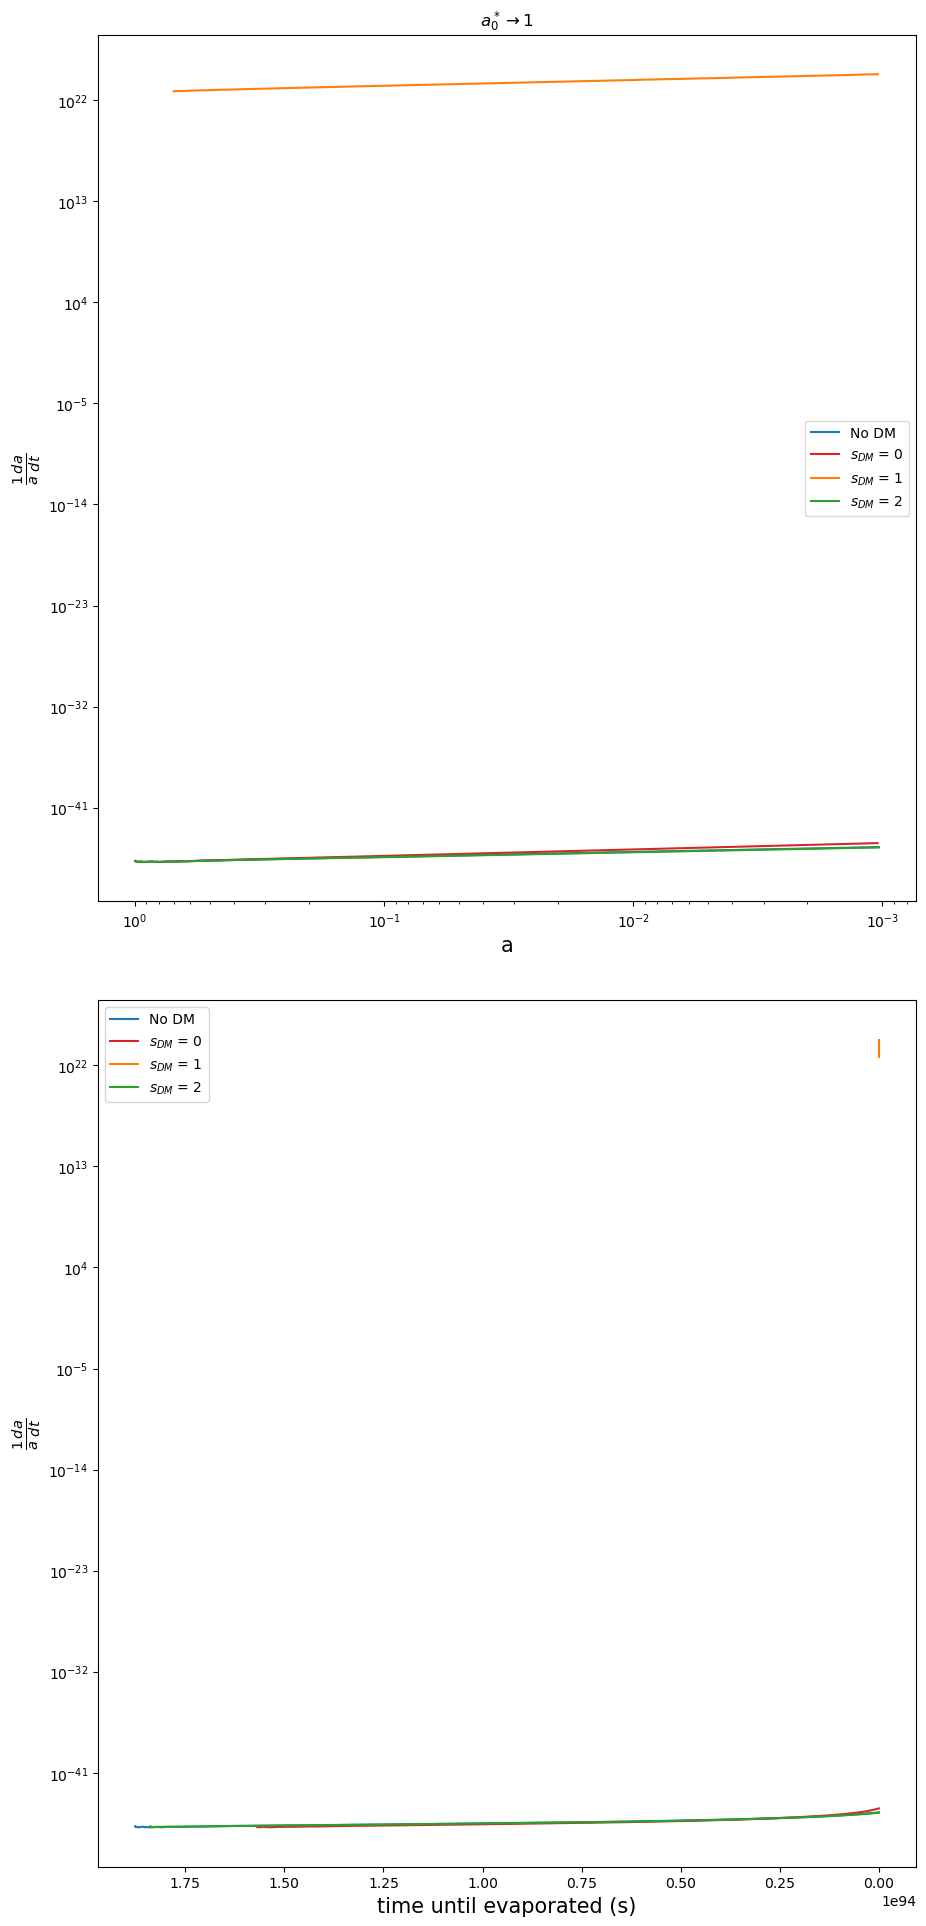

In [24]:
output_dataS0 = pd.read_csv(file_name10, delim_whitespace=True, header = 'infer', skiprows=2)
outputS0= [(a,b) for a,b in zip(output_dataS0['a'],output_dataS0['M'])]
dadtS0 = []



for x in outputS0:
    closest_a = closest_value(header, x[0])
    closest_m = closest_value(gdata.index,gev_to_g*x[1])

    cellf = df.loc[closest_m, "{:.5e}".format(closest_a)]
    cellg = gdata.loc[closest_m, "{:.5e}".format(closest_a)]

    dadtS0.append(x[0]*(2*cellf-cellg)/x[1]**3)


output_dataS1 = pd.read_csv(file_name11, delim_whitespace=True, header = 'infer', skiprows=2)
outputS1= [(a,b) for a,b in zip(output_dataS1['a'],output_dataS1['M'])]

dadtS1 = []

for x in outputS1:
    closest_a = closest_value(header, x[0])
    closest_m = closest_value(gdata.index,gev_to_g*x[1])

    cellf = df.loc[closest_m, "{:.5e}".format(closest_a)]
    cellg = gdata.loc[closest_m, "{:.5e}".format(closest_a)]

    dadtS1.append(x[0]*(2*cellf-cellg)/x[1]**3)



output_dataS2 = pd.read_csv(file_name9, delim_whitespace=True, header = 'infer', skiprows=2)
outputS2= [(a,b) for a,b in zip(output_dataS2['a'],output_dataS2['M'])]

dadtS2 = []

for x in outputS2:
    closest_a = closest_value(header, x[0])
    closest_m = closest_value(gdata.index,gev_to_g*x[1])

    cellf = df.loc[closest_m, "{:.5e}".format(closest_a)]
    cellg = gdata.loc[closest_m, "{:.5e}".format(closest_a)]

    dadtS2.append(x[0]*(2*cellf-cellg)/x[1]**3)

unit_dadt0 = np.divide(np.abs(dadtS0),output_dataS0['a'])
unit_dadt1 = np.divide(np.abs(dadtS1),output_dataS1['a'])
unit_dadt2 = np.divide(np.abs(dadtS2),output_dataS2['a'])
unit_dadt = np.divide(np.abs(dadt),output_data['a'])

unit_dadt0 = [x for x in unit_dadt0 if str(x) != 'nan'  ]
unit_dadt1 = [x for x in unit_dadt1 if str(x) != 'nan']
unit_dadt2 = [x for x in unit_dadt2 if str(x) != 'nan']
unit_dadt = [x for x in unit_dadt if str(x) != 'nan']
print(unit_dadt[-1])

tnone = np.array(output_data['t'])
t0 = np.array(output_dataS0['t'])
t1 = np.array(output_dataS1['t'])
t2 = np.array(output_dataS2['t'])

tnone = tnone[0:int(len(unit_dadt))]
t0 = t0[0:int(len(unit_dadt0)):]
t1= t1[0:int(len(unit_dadt1)):]
t2 = t2[0:int(len(unit_dadt2)):]

tnone = tnone[-1] -tnone
t0 = t0[-1] -t0
t1 =  t1[-1]-t1 
t2 = t2[-1] -t2

fig, ax = plt.subplots(2,1, figsize = ( (10,20)))
fig.tight_layout(pad = 5)
ax[0].plot(output_data['a'],np.divide(np.abs(dadt),output_data['a']),color = 'tab:blue', label = 'No DM')
ax[0].plot(output_dataS0['a'],np.divide(np.abs(dadtS0),output_dataS0['a']),color = 'tab:red', label = '$s_{DM}$ = 0')
ax[0].plot(output_dataS1['a'],np.divide(np.abs(dadtS1),output_dataS1['a']),color = 'tab:orange', label = '$s_{DM}$ = 1')
ax[0].plot(output_dataS2['a'],np.divide(np.abs(dadtS2),output_dataS2['a']),color = 'tab:green', label = '$s_{DM}$ = 2')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel( 'a', fontsize=fsize)
ax[0].set_ylabel( '$\\frac{1}{a} \\frac{da}{dt}$', fontsize= fsize)
ax[0].invert_xaxis()
ax[0].set_title('$a^*_{0} \\rightarrow 1 $')
ax[0].legend()

ax[1].plot(tnone,unit_dadt,color = 'tab:blue', label = 'No DM')
ax[1].plot(t0,unit_dadt0,color = 'tab:red', label = '$s_{DM}$ = 0')
ax[1].plot(t1,unit_dadt1,color = 'tab:orange', label = '$s_{DM}$ = 1')
ax[1].plot(t2,unit_dadt2,color = 'tab:green', label = '$s_{DM}$ = 2')
# ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel( 'time until evaporated (s)', fontsize=fsize)
ax[1].set_ylabel( '$\\frac{1}{a} \\frac{da}{dt}$', fontsize= fsize)
# ax[1].set_xlim(5e90,2.1e94)
ax[1].invert_xaxis()
ax[1].legend()


# Page Factors for Spin

/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/1904804175.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gdata = pd.read_csv(file3, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/1904804175.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gdata = pd.read_csv(file3, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/1904804175.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gdata = pd.read_csv(file3, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/a')
/var/folders/

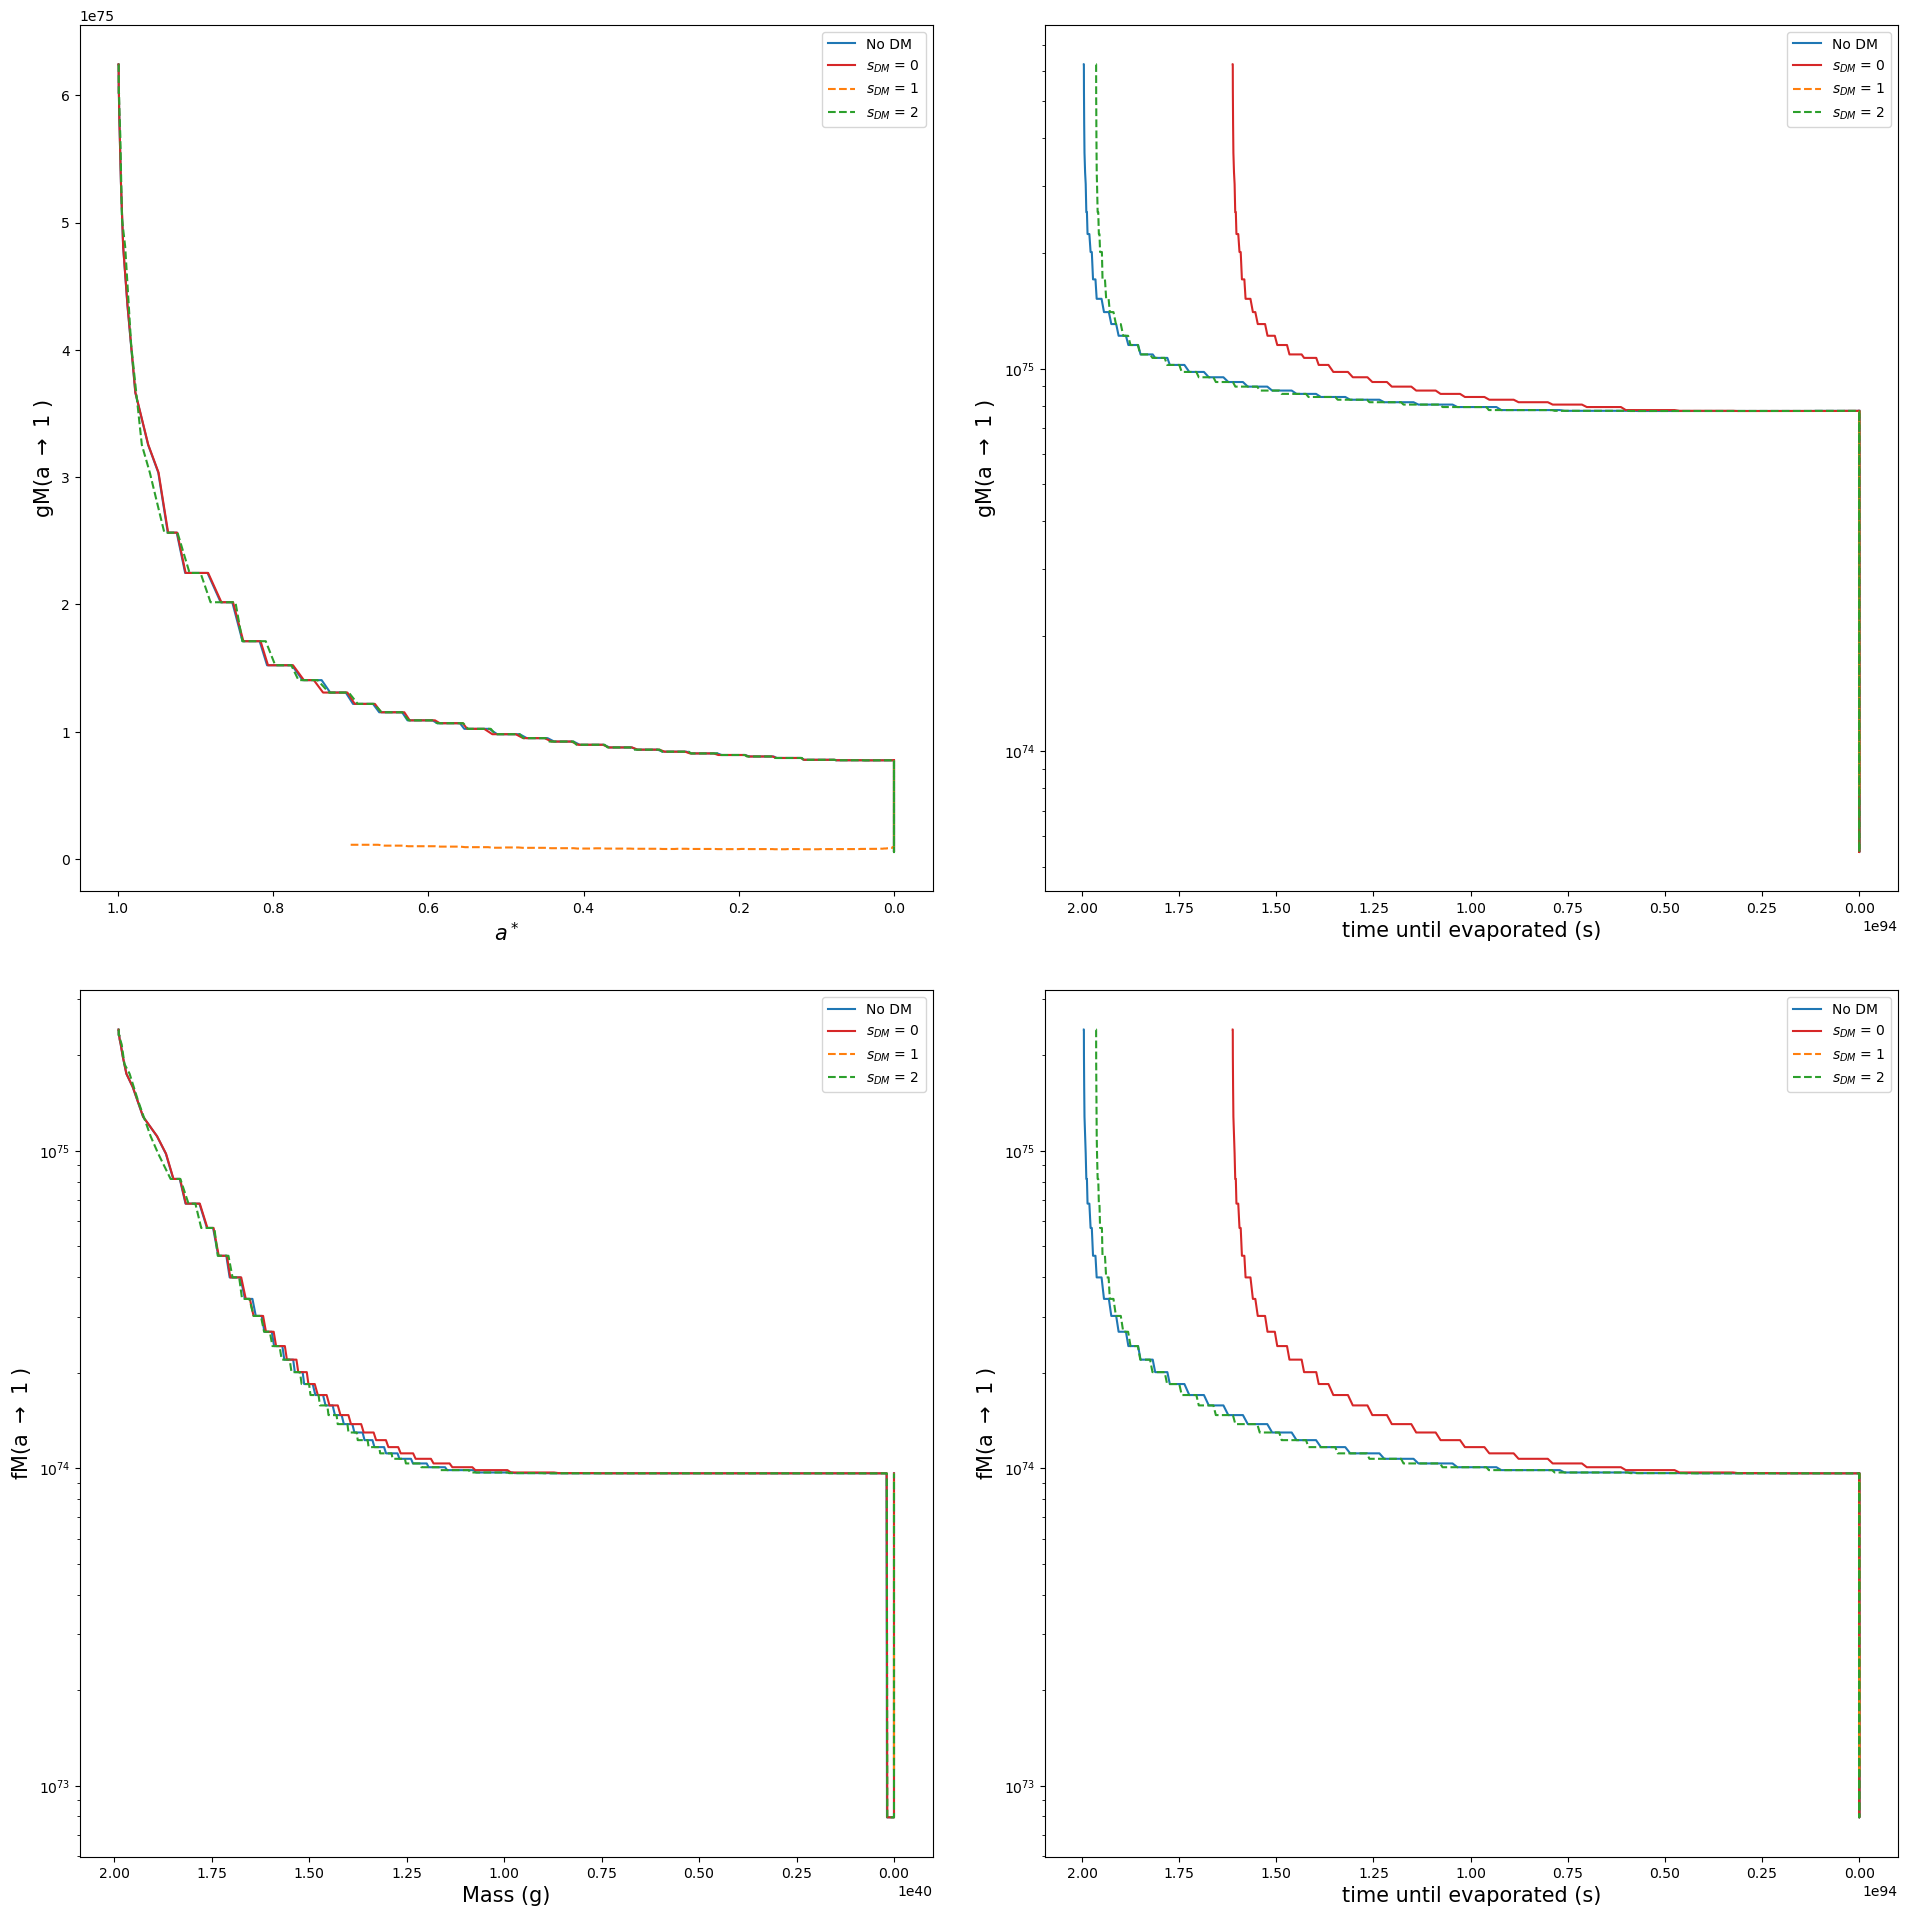

In [25]:
gMS0 = cell_findergM(outputS0)
gMS1 = cell_findergM(outputS1)
gMS2 = cell_findergM(outputS2)

fMS0 = cell_finderfM(outputS0)
fMS1 = cell_finderfM(outputS1)
fMS2 = cell_finderfM(outputS2)

tnone = np.array(output_data['t'])
t0 = np.array(output_dataS0['t'])
t1 = np.array(output_dataS1['t'])
t2 = np.array(output_dataS2['t'])

tnone = tnone[-1] -tnone
t0 = t0[-1] -t0
t1 =  t1[-1]-t1 
t2 = t2[-1] -t2


fig, ax = plt.subplots(2,2, figsize = ( (20,20)))
fig.tight_layout(pad = 5)



ax[0,0].plot(output_data['a'],gM_a,color = 'tab:blue', label = 'No DM')
ax[0,0].plot(output_dataS0['a'],gMS0 ,color = 'tab:red' ,label = '$s_{DM}$ = 0')
ax[0,0].plot(output_dataS1['a'],gMS1 ,color = 'tab:orange' ,label = '$s_{DM}$ = 1',linestyle = '--')
ax[0,0].plot(output_dataS2['a'],gMS2 ,color = 'tab:green' ,label = '$s_{DM}$ = 2',linestyle = '--')
# ax[0].set_xscale('log')
# ax[0].set_yscale('log')
ax[0,0].set_xlabel( '$a^*$', fontsize=fsize)
ax[0,0].set_ylabel( 'gM(a $\\rightarrow$ 1 )', fontsize= fsize)
ax[0,0].legend()
ax[0,0].invert_xaxis()


ax[1,0].plot(output_data['M'],fM_a,color = 'tab:blue', label = 'No DM')
ax[1,0].plot(output_dataS0['M'],fMS0 ,color = 'tab:red' ,label = '$s_{DM}$ = 0')
ax[1,0].plot(output_dataS1['M'],fMS1 ,color = 'tab:orange' ,label = '$s_{DM}$ = 1',linestyle = '--')
ax[1,0].plot(output_dataS2['M'],fMS2 ,color = 'tab:green' ,label = '$s_{DM}$ = 2',linestyle = '--')
# ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel( 'Mass (g)', fontsize=fsize)
ax[1,0].set_ylabel( 'fM(a $\\rightarrow$ 1 )', fontsize= fsize)
# ax[1,0].set_xlim(0,1e17)
ax[1,0].legend()
ax[1,0].invert_xaxis()



ax[0,1].plot(tnone,gM_a,color = 'tab:blue', label = 'No DM')
ax[0,1].plot(t0,gMS0 ,color = 'tab:red' ,label = '$s_{DM}$ = 0')
ax[0,1].plot(t1,gMS1 ,color = 'tab:orange' ,label = '$s_{DM}$ = 1',linestyle = '--')
ax[0,1].plot(t2,gMS2 ,color = 'tab:green' ,label = '$s_{DM}$ = 2',linestyle = '--')
# ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel( 'time until evaporated (s)', fontsize=fsize)
ax[0,1].set_ylabel( 'gM(a $\\rightarrow$ 1 )', fontsize= fsize)
ax[0,1].legend()
ax[0,1].invert_xaxis()

# ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].plot(tnone,fM_a,color = 'tab:blue', label = 'No DM')
ax[1,1].plot(t0,fMS0 ,color = 'tab:red' ,label = '$s_{DM}$ = 0')
ax[1,1].plot(t1,fMS1 ,color = 'tab:orange' ,label = '$s_{DM}$ = 1',linestyle = '--')
ax[1,1].plot(t2,fMS2 ,color = 'tab:green' ,label = '$s_{DM}$ = 2',linestyle = '--')
ax[1,1].set_xlabel( 'time until evaporated (s)', fontsize=fsize)
ax[1,1].set_ylabel( 'fM(a $\\rightarrow$ 1 )', fontsize= fsize)
ax[1,1].legend()
ax[1,1].invert_xaxis()




# Charged Black Hole Time Evolution

In [26]:
def cell_finder3000fC(out):
    path = os.getcwd()
    filename = '/Charge_Page_Tables/fM_testM.txt'
    file1 = '{}/{}'.format(path,filename)
    df = pd.read_csv(file1, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/Q') 
#Get list of all computed a^* values
#Convert from str to float
    header = df.columns
    header = [float(a) for a in header]

#Conversion factor to get fM and Blackhawk output data in same units (fM in GeV, BH in grams)
    gev_to_g = 5.60958884e+23

    fM_Q = []
    Q = []
    m = []

    for x in out:

        closest_Q = closest_value(header, x[0])
        closest_m = closest_value(df.index,gev_to_g*x[1])
        cell = df.loc[closest_m, "{:.5e}".format(closest_Q)]
        Q.append(closest_Q)
        m.append(closest_m)
        fM_Q.append(cell)
    return fM_Q

def cell_finder3000hC(out):
    path = os.getcwd()
    filename = '/Charge_Page_Tables/hM_testM.txt'
    file1 = '{}/{}'.format(path,filename)
    df = pd.read_csv(file1, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/Q') 
#Get list of all computed a^* values
#Convert from str to float
    header = df.columns
    header = [float(a) for a in header]

#Conversion factor to get fM and Blackhawk output data in same units (fM in GeV, BH in grams)
    gev_to_g = 5.60958884e+23

    hM_Q = []
    Q = []
    m = []

    for x in out:

        closest_Q = closest_value(header, x[0])
        if closest_Q == 0:
            hM_Q.append(0)
        else:
            closest_m = closest_value(df.index,gev_to_g*x[1])
            cell = df.loc[closest_m, "{:.5e}".format(closest_Q)]
            Q.append(closest_Q)
            m.append(closest_m)
            hM_Q.append(cell)
    return hM_Q


output_data_charge = pd.read_csv('Charge_evolution.txt', delim_whitespace=True, header = 'infer', skiprows=2)
outputcharge= [(a,b) for a,b in zip(output_data_charge['Q'],output_data_charge['M'])]


hM_c= cell_finder3000hC(outputcharge)
fM_c = cell_finder3000fC(outputcharge)
t_charge = np.array(output_data_charge['t'])
t_charge = t_charge[-1] - t_charge
print(output_data_charge['t'].iloc[-1])




6.789923153165933e+48


/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/733798003.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_data_charge = pd.read_csv('Charge_evolution.txt', delim_whitespace=True, header = 'infer', skiprows=2)
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/733798003.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file1, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/Q')
/var/folders/__/68q69_j51cj16zb24xlwg1kw0000gn/T/ipykernel_14387/733798003.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file1, delim_whitespace=True, header = 'infer', skiprows=0, index_col = 'mass/Q')


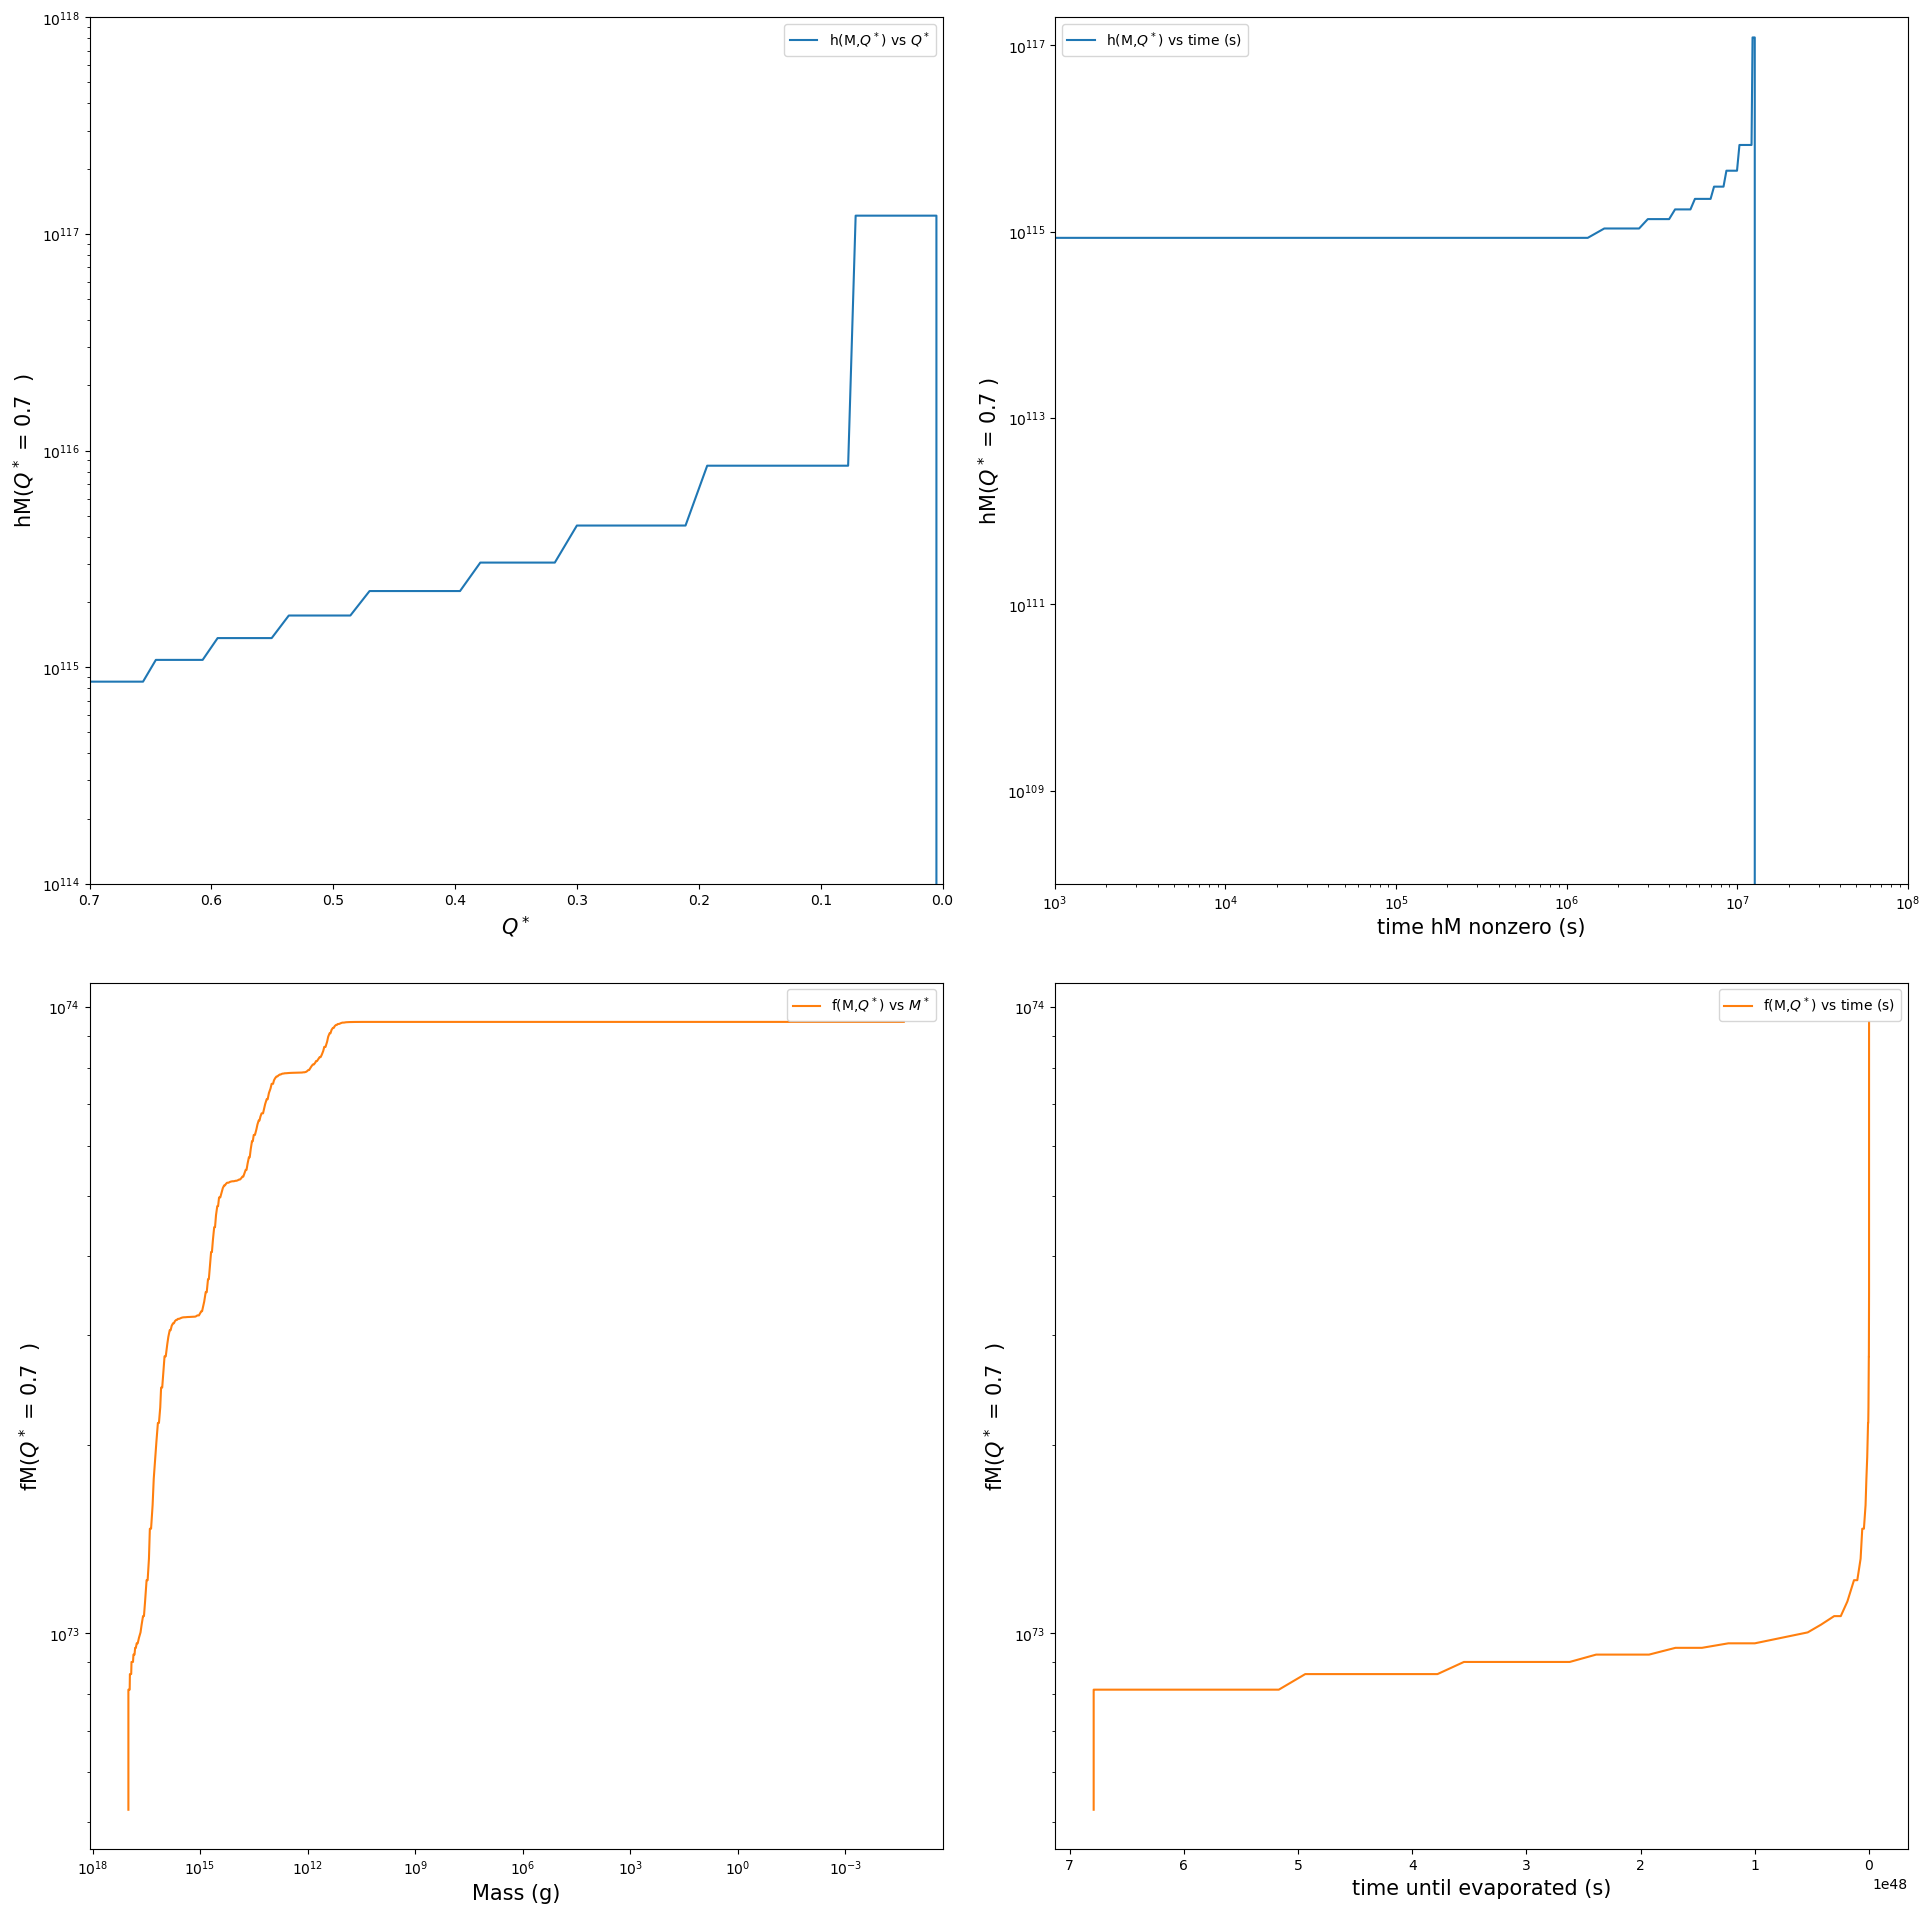

In [27]:

fig, ax = plt.subplots(2,2, figsize = ( (20,20)))
fig.tight_layout(pad = 5)

## hM vs Q ##
ax[0,0].plot(output_data_charge['Q'],hM_c,color = 'tab:blue', label = 'h(M,$Q^*$) vs $Q^*$')
# ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel( '$Q^*$', fontsize=fsize)
ax[0,0].set_ylabel( 'hM($Q^*$ = 0.7  )', fontsize= fsize)
ax[0,0].legend()
ax[0,0].set_xlim(0,0.7)
ax[0,0].set_ylim(1e114,1e118)
ax[0,0].invert_xaxis()


## FM VS M ##
ax[1,0].plot(output_data_charge['M'],fM_c,color = 'tab:orange', label = 'f(M,$Q^*$) vs $M^*$')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel( 'Mass (g)', fontsize=fsize)
ax[1,0].set_ylabel( 'fM($Q^*$ = 0.7  )', fontsize= fsize)
ax[1,0].legend()
ax[1,0].invert_xaxis()


## hM VS t ##
ax[0,1].plot(output_data_charge['t'],hM_c,color = 'tab:blue', label = 'h(M,$Q^*$) vs time (s)')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel( 'time hM nonzero (s)', fontsize=fsize)
ax[0,1].set_ylabel( 'hM($Q^*$ = 0.7 )', fontsize= fsize)
ax[0,1].legend()
ax[0,1].set_xlim(1e3,1e8)
ax[0,1].set_ylim(1e108,2e117)
# ax[0,1].invert_xaxis()

## fM vs t #3
# ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].plot(t_charge,fM_c,color = 'tab:orange', label = 'f(M,$Q^*$) vs time (s)')
ax[1,1].set_xlabel( 'time until evaporated (s)', fontsize=fsize)
ax[1,1].set_ylabel( 'fM($Q^*$ = 0.7  )', fontsize= fsize)
ax[1,1].legend()
ax[1,1].invert_xaxis()

# Varying $a^*$ 

Kerr_a0.1.txt
                t             M    a
0    1.238330e-21  1.000000e+17  0.1
1    2.476650e-21  1.000000e+17  0.1
2    4.953310e-21  1.000000e+17  0.1
3    9.906620e-21  1.000000e+17  0.1
4    1.981320e-20  1.000000e+17  0.1
..            ...           ...  ...
959  4.245010e+24  3.540690e-05  0.0
960  4.245010e+24  3.267620e-05  0.0
961  4.245010e+24  2.947010e-05  0.0
962  4.245010e+24  2.749920e-05  0.0
963  4.245010e+24  2.523580e-05  0.0

[964 rows x 3 columns]
Kerr_a0.2.txt
                t             M    a
0    1.238330e-21  1.000000e+17  0.2
1    2.476650e-21  1.000000e+17  0.2
2    4.953310e-21  1.000000e+17  0.2
3    9.906620e-21  1.000000e+17  0.2
4    1.981320e-20  1.000000e+17  0.2
..            ...           ...  ...
952  4.165560e+24  3.383510e-05  0.0
953  4.165560e+24  3.084480e-05  0.0
954  4.165560e+24  2.904580e-05  0.0
955  4.165560e+24  2.701690e-05  0.0
956  4.165560e+24  2.467190e-05  0.0

[957 rows x 3 columns]
Kerr_a0.3.txt
                t     

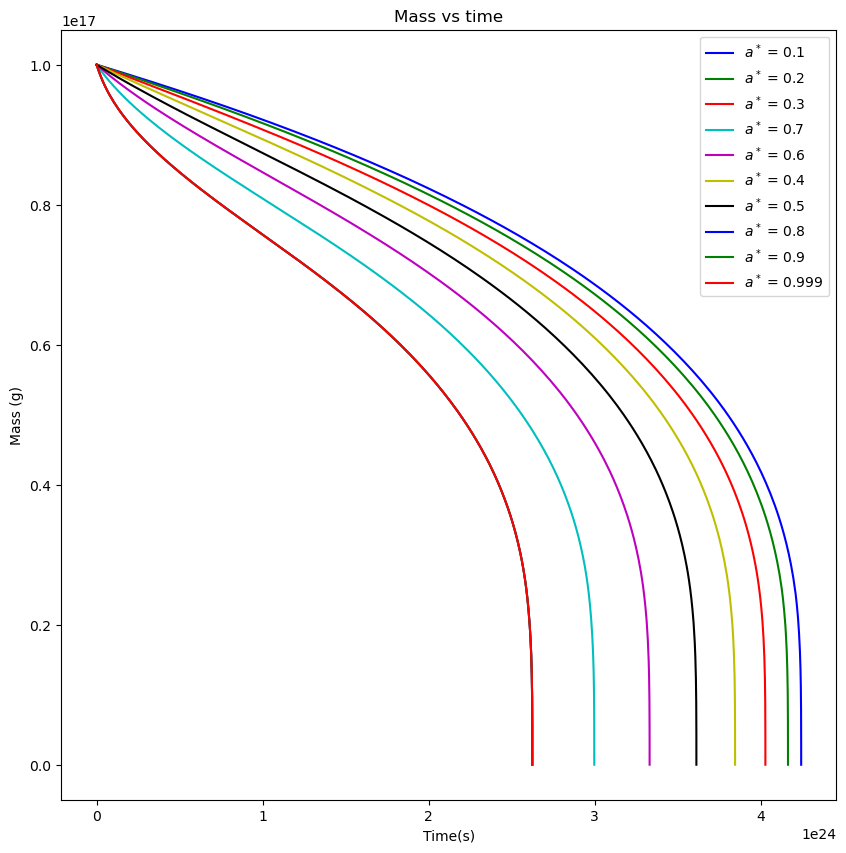

In [28]:
import re
folder_path = './Vary_a'  # Replace with your folder path
# Get the list of all CSV files in the folder
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Loop through the data files
for i,file in enumerate(data_files):
    print(file)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, skipinitialspace=True, delimiter =' ', header=2)
    # Assume the data has two columns: 'x' and 'y'
    print(data)
    time = data['t']
    mass = data['M']
    spin = data['a']
    numbers = re.findall(r'\d+\.\d+', file)
    
    # Plot the data on the same figure
    plt.plot(time, mass, label= '$a^*$ = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 


# Adding titles and labels
plt.title('Mass vs time')

plt.ylabel('Mass (g)')
plt.xlabel('Time(s)')
# plt.yscale('log')
plt.legend()
plt.gcf().set_size_inches(10, 10)






Kerr_a0.1.txt
                t             M    a
0    1.238330e-21  1.000000e+17  0.1
1    2.476650e-21  1.000000e+17  0.1
2    4.953310e-21  1.000000e+17  0.1
3    9.906620e-21  1.000000e+17  0.1
4    1.981320e-20  1.000000e+17  0.1
..            ...           ...  ...
959  4.245010e+24  3.540690e-05  0.0
960  4.245010e+24  3.267620e-05  0.0
961  4.245010e+24  2.947010e-05  0.0
962  4.245010e+24  2.749920e-05  0.0
963  4.245010e+24  2.523580e-05  0.0

[964 rows x 3 columns]
Kerr_a0.2.txt
                t             M    a
0    1.238330e-21  1.000000e+17  0.2
1    2.476650e-21  1.000000e+17  0.2
2    4.953310e-21  1.000000e+17  0.2
3    9.906620e-21  1.000000e+17  0.2
4    1.981320e-20  1.000000e+17  0.2
..            ...           ...  ...
952  4.165560e+24  3.383510e-05  0.0
953  4.165560e+24  3.084480e-05  0.0
954  4.165560e+24  2.904580e-05  0.0
955  4.165560e+24  2.701690e-05  0.0
956  4.165560e+24  2.467190e-05  0.0

[957 rows x 3 columns]
Kerr_a0.3.txt
                t     

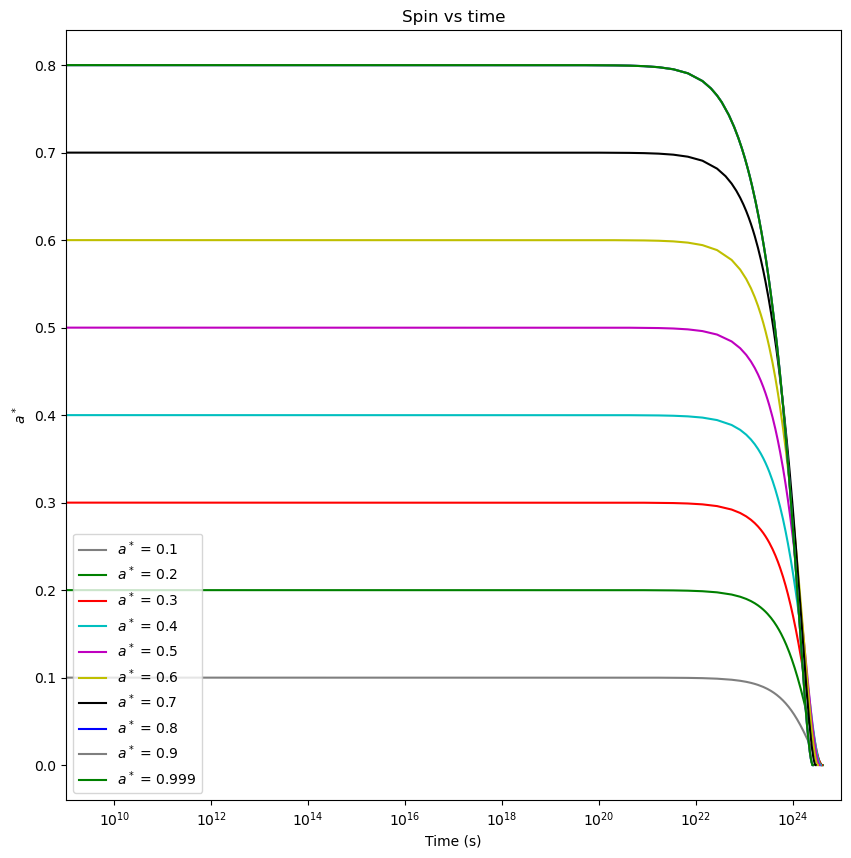

In [29]:

folder_path = './Vary_a'  # Replace with your folder path
# Get the list of all CSV files in the folder
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = ['tab:gray', 'g', 'r', 'c', 'm', 'y', 'k','b']

# Loop through the data files
for i,file in enumerate(data_files):
    print(file)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, skipinitialspace=True, delimiter =' ', header=2)
    # Assume the data has two columns: 'x' and 'y'
    print(data)
    time = data['t']
    spin = data['a']
    numbers = re.findall(r'\d+\.\d+', file)
    
    # Plot the data on the same figure
    plt.plot(time, spin, label= '$a^*$ = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 

# Adding titles and labels
plt.title('Spin vs time')

plt.ylabel('$a^*$')
plt.xlabel('Time (s)')
# plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlim(1e9,1e25)
plt.gcf().set_size_inches(10, 10)


# Looking at dMdt/dadt

In [2]:
import matplotlib.ticker as mtick
folder_path = './Vary_a'  # Replace with your folder path
# Get the list of all CSV files in the folder
data_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
data_files.sort()
colors = plt.cm.Spectral(np.linspace(0, 1, len(data_files)))

header = df.columns
header = [float(a) for a in header]
print(header)

fig, ax = plt.subplots()
for i,file in enumerate(data_files):
    print(file)
    print(i)
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path,skipinitialspace=True, delimiter =' ', header=2 )
    # Assume the data has two columns: 'x' and 'y'
    dadt = []
    dMdt = []
    output= [(a,b) for a,b in zip(data['a'],data['M'])]

    for x in output:
        closest_a = closest_value(header, x[0])
        closest_m = closest_value(gdata.index,gev_to_g*x[1])
        cellf = df.loc[closest_m, "{:.5e}".format(closest_a)]
        cellg = gdata.loc[closest_m, "{:.5e}".format(closest_a)]
        dadt.append((2*cellf-cellg)/x[1]**3)
        dMdt.append(-cellf/x[1]**3)

    time = data['t']
    numbers = re.findall(r'\d+\.\d+', file)
    a_change = []
    t_change = []
    d = 0
    for j, a in enumerate(dadt):
        if a != 0:
            a_change.append(dMdt[i]/a)
            t_change.append(time[j]/time[len(time)-1])
            # d+= time[j]/time[len(time)-1]
    ax.plot(t_change, a_change, label= 'a = {}'.format(numbers[0]), color=colors[ i % len(colors)]) 

ax.set_title('$\\frac{a^*}{M} \ \\frac{dM/dt}{da^*/dt}$ vs t')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$\\frac{a^*}{M} \  \\frac{dM/dt}{da^*/dt}$')
ax.set_xlabel('% of lifetime')
# a.hlines(1,1e26,1e28)
ax.set_xlim(5e-1,1.01)
ax.set_ylim(1e-3,1)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend()
plt.gcf().set_size_inches(10, 10)

NameError: name 'os' is not defined